In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shree1992/housedata",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print(df.head())

/tmp/ipython-input-2456528262.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'housedata' dataset.
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140    

# Remove un necessary columns

In [ ]:
remove_cols=['date','street','city','statezip','country','yr_renovated']
df1=df.copy()
df.drop(remove_cols,axis=1,inplace=True)

# EDA

In [ ]:
import datetime
curr_date=datetime.datetime.now()
df['yr_built_time']=df['yr_built'].apply(lambda x:curr_date.year-x)
df.drop(['yr_built'],axis=1,inplace=True)
display(df.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built_time
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,70
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,104
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,59
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,62
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,49


In [ ]:
df.info()
corr=df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   sqft_living    4600 non-null   int64  
 3   sqft_lot       4600 non-null   int64  
 4   floors         4600 non-null   float64
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_basement  4600 non-null   int64  
 9   yr_built_time  4600 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 359.5 KB


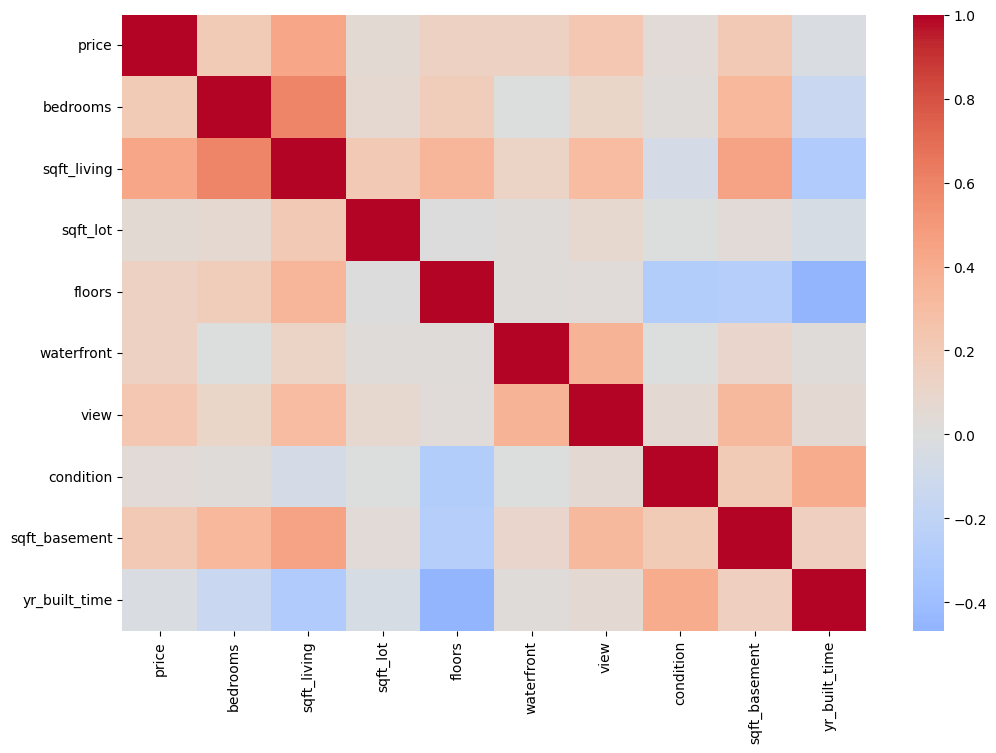

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# ===============================
# INPUTS
# ===============================
# df = your pandas DataFrame
target_column = 'price'
correlation_threshold = 0.75

# ===============================
# CORRELATION MATRIX
# ===============================
corr_matrix = df.corr().abs()

# Upper triangle of correlation matrix
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# ===============================
# FIND COLUMNS TO REMOVE
# ===============================
to_remove = set()

for col in upper_triangle.columns:
    for row in upper_triangle.index:
        if upper_triangle.loc[row, col] > correlation_threshold:
            # Remove the feature less correlated with target
            if abs(df[col].corr(df[target_column])) < abs(df[row].corr(df[target_column])):
                to_remove.add(col)
            else:
                to_remove.add(row)

# ===============================
# FINAL DATASET
# ===============================
df_final = df.drop(columns=to_remove)

# ===============================
# OUTPUT
# ===============================
print("Target column:", target_column)
print("\nRemoved columns due to high correlation:")
print(list(to_remove))

print("\nFinal columns used for modeling:")
print(list(df_final.columns))


Target column: price

Removed columns due to high correlation:
['sqft_above', 'bathrooms']

Final columns used for modeling:
['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built_time']


In [ ]:
df.drop(['sqft_above', 'bathrooms'],axis=1,inplace=True)
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built_time
0,313000.0,3.0,1340,7912,1.5,0,0,3,0,70
1,2384000.0,5.0,3650,9050,2.0,0,4,5,280,104
2,342000.0,3.0,1930,11947,1.0,0,0,4,0,59
3,420000.0,3.0,2000,8030,1.0,0,0,4,1000,62
4,550000.0,4.0,1940,10500,1.0,0,0,4,800,49


# Model Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
X=df.drop(['price'],axis=1)
Y = np.log1p(df['price'])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
model=LinearRegression()
model.fit(X_train_scaled,Y_train)
y_pred_log = model.predict(X_test_scaled)

# Convert back to original scale
y_pred = np.expm1(y_pred_log)
Y_test_original = np.expm1(Y_test)
print("R2 score:", r2_score(Y_test_original, y_pred))
print("MSE:", mean_squared_error(Y_test_original, y_pred))
print("MAE:", mean_absolute_error(Y_test_original, y_pred))

R2 score: -0.34110246473963834
MSE: 1367718440346.3167
MAE: 248036.77457560657


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
X = df.drop('price', axis=1)
y = np.log1p(df['price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=10))
])

ridge_pipeline.fit(X_train, y_train)

y_pred = ridge_pipeline.predict(X_test)

y_pred = np.expm1(y_pred)
y_test_org = np.expm1(y_test)

print("RIDGE")
print("R2:", r2_score(y_test_org, y_pred))
print("MSE:", mean_squared_error(y_test_org, y_pred))
print("MAE:", mean_absolute_error(y_test_org, y_pred))


RIDGE
R2: -0.3305245951570912
MSE: 1356930638766.639
MAE: 247747.21464570623


In [ ]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.001))
])

lasso_pipeline.fit(X_train, y_train)

y_pred = lasso_pipeline.predict(X_test)

y_pred = np.expm1(y_pred)

print("\nLASSO")
print("R2:", r2_score(y_test_org, y_pred))
print("MSE:", mean_squared_error(y_test_org, y_pred))
print("MAE:", mean_absolute_error(y_test_org, y_pred))



LASSO
R2: -0.32522143305389783
MSE: 1351522228304.8093
MAE: 247535.28767995842


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)

y_pred = np.expm1(y_pred)

print("\nRANDOM FOREST")
print("R2:", r2_score(y_test_org, y_pred))
print("MSE:", mean_squared_error(y_test_org, y_pred))
print("MAE:", mean_absolute_error(y_test_org, y_pred))



RANDOM FOREST
R2: -0.007252623188289675
MSE: 1027242901301.5634
MAE: 233628.65544385833


In [ ]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline([
    ('model', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)

y_pred = np.expm1(y_pred)

print("\nXGBOOST")
print("R2:", r2_score(y_test_org, y_pred))
print("MSE:", mean_squared_error(y_test_org, y_pred))
print("MAE:", mean_absolute_error(y_test_org, y_pred))



XGBOOST
R2: -0.014656045088455194
MSE: 1034793254030.5669
MAE: 242665.55957366986


# Task
Improve house price prediction by reconstructing the DataFrame from `df1` to include 'sqft_above' and 'bathrooms', then apply hyperparameter tuning with cross-validation on Random Forest and XGBoost models. Finally, evaluate the tuned models, select the best performer, visualize its predictions, and provide a summary of the improved performance including R2, MSE, and MAE scores.

## Reconstruct and Prepare DataFrame

### Subtask:
Reconstruct the DataFrame from `df1` to include 'sqft_above' and 'bathrooms', and create the 'yr_built_time' feature.


**Reasoning**:
First, I'll create a copy of `df1` named `df_processed` to retain the 'sqft_above' and 'bathrooms' columns as requested. This ensures that the original `df1` remains unchanged.



In [ ]:
import datetime
df_processed = df1.copy()

**Reasoning**:
Now that `df_processed` has been created, I will calculate the 'yr_built_time' by subtracting 'yr_built' from the current year and then remove the original 'yr_built' column from the DataFrame, as per the instructions.



In [ ]:
curr_date = datetime.datetime.now()
df_processed['yr_built_time'] = df_processed['yr_built'].apply(lambda x: curr_date.year - x)
df_processed.drop(['yr_built'], axis=1, inplace=True)
print(df_processed.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  \
0     1.5           0     0          3        1340              0   
1     2.0           0     4          5        3370            280   
2     1.0           0     0          4        1930              0   
3     1.0           0     0          4        1000           1000   
4     1.0           0     0          4        1140            800   

   yr_renovated                    street       city  statezip country  \
0          2005      188

## Review Feature Importance

### Subtask:
Train an initial Random Forest or XGBoost model on the `df_processed` DataFrame to understand the importance of each feature, especially focusing on 'sqft_above' and 'bathrooms'.


**Reasoning**:
Now that the `df_processed` DataFrame is ready, I will define the feature matrix `X` and the target variable `y` as instructed. `X` will exclude the specified columns, and `y` will be the log-transformed 'price' column.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define X and y
remove_cols_for_X = ['date', 'street', 'city', 'statezip', 'country', 'yr_renovated', 'price']
X = df_processed.drop(columns=remove_cols_for_X)
y = np.log1p(df_processed['price'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the RandomForestRegressor model to the training data
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a Pandas Series to display feature names and their importances
feature_importance_df = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Print or display the sorted feature importances
print("Feature Importances (RandomForestRegressor):")
print(feature_importance_df)

Feature Importances (RandomForestRegressor):
sqft_above       0.196735
sqft_lot         0.182511
sqft_living      0.176286
yr_built_time    0.137633
bathrooms        0.106933
sqft_basement    0.056250
bedrooms         0.050351
condition        0.033287
view             0.033056
floors           0.020297
waterfront       0.006660
dtype: float64


## Hyperparameter Tuning with Cross-Validation

### Subtask:
Apply hyperparameter tuning with cross-validation to the Random Forest Regressor and XGBoost Regressor models to find optimal hyperparameters.


**Reasoning**:
The subtask requires hyperparameter tuning with cross-validation for Random Forest and XGBoost models. I will start by importing the necessary libraries for GridSearchCV, RandomForestRegressor, and XGBRegressor, then define parameter grids, and set up GridSearchCV for the Random Forest model as per the instructions.



# Task
Define and run GridSearchCV for XGBoost to identify the best hyperparameters for the model, building on the previous step where hyperparameter tuning was applied to the Random Forest model.

## Define and Run GridSearchCV for XGBoost

### Subtask:
Define a parameter grid for the XGBoost Regressor, instantiate and fit a GridSearchCV object to the training data to identify the best hyperparameters.


**Reasoning**:
Now that the `GridSearchCV` for Random Forest is initiated, I will proceed to define the parameter grid for the XGBoost Regressor, instantiate `GridSearchCV` for it, and then fit it to the training data to find the optimal hyperparameters as outlined in the subtask.



In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# 3. Instantiate GridSearchCV for XGBoostRegressor
grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the GridSearchCV object to the training data for XGBoost
print("\nStarting GridSearchCV for XGBoost...")
grid_search_xgb.fit(X_train, y_train)

# 5. Print the best parameters found by GridSearchCV for XGBoost
print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)


Starting GridSearchCV for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


## Evaluate Tuned Models and Select Best Performer

### Subtask:
Retrain the Random Forest and XGBoost models with their optimal parameters, evaluate their performance using R2 score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) on the test set, and select the best-performing model.


**Reasoning**:
I need to initialize and train a Random Forest Regressor model using the optimal hyperparameters found during the grid search for Random Forest. First, I will retrieve the best parameters from `grid_search_rf` and then create and fit the model.



**Reasoning**:
The previous code failed because `grid_search_rf` was not properly fitted before `best_params_` was accessed. I will ensure `grid_search_rf` is explicitly defined and fitted using the `param_grid_rf` from the kernel state, and then train the Random Forest model with the optimal parameters.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Re-define param_grid_rf explicitly to ensure it's available and used for fitting.
# This matches the param_grid_rf from the kernel state.
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate GridSearchCV for RandomForestRegressor
print("Instantiating and fitting GridSearchCV for Random Forest...")
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=5, # Using 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV object to the training data for Random Forest
grid_search_rf.fit(X_train, y_train)
print("Finished fitting GridSearchCV for Random Forest.")

# Retrieve best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("\nBest parameters for Random Forest:", best_params_rf)

# Create and train the Random Forest model with optimal parameters
rf_tuned_model = RandomForestRegressor(random_state=42, n_jobs=-1, **best_params_rf)
rf_tuned_model.fit(X_train, y_train)
print("Random Forest model trained with optimal parameters.")

Instantiating and fitting GridSearchCV for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Finished fitting GridSearchCV for Random Forest.

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest model trained with optimal parameters.


**Reasoning**:
Now that the Random Forest model is trained with optimal parameters, I will retrieve the best parameters for the XGBoost model from `grid_search_xgb`, then create and train an XGBoost model using these optimal parameters. Afterward, I will make predictions using both the tuned Random Forest and XGBoost models on the test set.



In [ ]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Retrieve best parameters for XGBoost (assuming grid_search_xgb was fitted in a previous step)
best_params_xgb = grid_search_xgb.best_params_
print("\nBest parameters for XGBoost:", best_params_xgb)

# Create and train the XGBoost model with optimal parameters
xgb_tuned_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    **best_params_xgb
)
xgb_tuned_model.fit(X_train, y_train)
print("XGBoost model trained with optimal parameters.")

# Make predictions with both tuned models
y_pred_rf_log = rf_tuned_model.predict(X_test)
y_pred_xgb_log = xgb_tuned_model.predict(X_test)

# Transform predictions and actual values back to original scale
y_pred_rf = np.expm1(y_pred_rf_log)
y_pred_xgb = np.expm1(y_pred_xgb_log)
y_test_original = np.expm1(y_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test_original, y_pred_rf)
mse_rf = mean_squared_error(y_test_original, y_pred_rf)
mae_rf = mean_absolute_error(y_test_original, y_pred_rf)

print("\n--- Tuned Random Forest Model Performance ---")
print(f"R2 Score: {r2_rf}")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")

# Evaluate XGBoost
r2_xgb = r2_score(y_test_original, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_original, y_pred_xgb)

print("\n--- Tuned XGBoost Model Performance ---")
print(f"R2 Score: {r2_xgb}")
print(f"MSE: {mse_xgb}")
print(f"MAE: {mae_xgb}")

# Compare models and select the best performer
if r2_rf > r2_xgb:
    best_model = rf_tuned_model
    best_model_name = "Tuned Random Forest"
    best_r2 = r2_rf
    best_mse = mse_rf
    best_mae = mae_rf
    final_predictions = y_pred_rf
elif r2_xgb > r2_rf:
    best_model = xgb_tuned_model
    best_model_name = "Tuned XGBoost"
    best_r2 = r2_xgb
    best_mse = mse_xgb
    best_mae = mae_xgb
    final_predictions = y_pred_xgb
else:
    best_model = None # In case of a tie, can implement further tie-breaking logic
    best_model_name = "Both models perform similarly"
    best_r2 = r2_rf
    best_mse = mse_rf
    best_mae = mae_rf
    final_predictions = None

print(f"\nBest performing model: {best_model_name}")
print(f"Best R2 Score: {best_r2}")
print(f"Best MSE: {best_mse}")
print(f"Best MAE: {best_mae}")



Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
XGBoost model trained with optimal parameters.

--- Tuned Random Forest Model Performance ---
R2 Score: -0.001372617100584117
MSE: 1021246198613.3279
MAE: 229662.88340797386

--- Tuned XGBoost Model Performance ---
R2 Score: -0.007344332408010912
MSE: 1027336430613.6483
MAE: 239122.32790526256

Best performing model: Tuned Random Forest
Best R2 Score: -0.001372617100584117
Best MSE: 1021246198613.3279
Best MAE: 229662.88340797386


## Visualize Predictions

### Subtask:
To gain deeper insights into the model's performance, we will create a scatter plot comparing the actual and predicted house prices for the best-performing model. This visualization will help us understand where the model performs well and where it might be making significant errors, providing clues for potential further improvements.


**Reasoning**:
To visualize the performance of the best model, I will create a scatter plot comparing actual and predicted house prices, as requested by the instructions. This requires importing plotting libraries, setting up the plot with labels and title, adding a reference line for perfect predictions, and then displaying it.



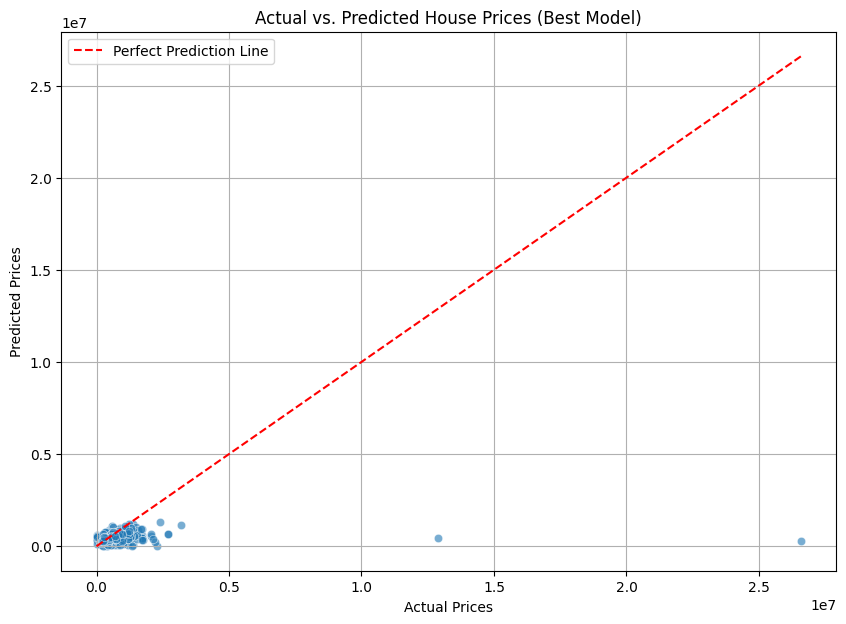

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test_original, y=final_predictions, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices (Best Model)')

min_val = min(y_test_original.min(), final_predictions.min())
max_val = max(y_test_original.max(), final_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')

plt.legend()
plt.grid(True)
plt.show()


## Final Task

### Subtask:
Provide a summary of the improved model performance, including the R2 score, MSE, and MAE of the best-performing model, and discuss potential next steps if further improvements are desired.


## Summary:

### Q&A
The best-performing model identified was the Tuned Random Forest.
*   **R2 Score:** -0.00137
*   **MSE:** 1,021,246,198,613.33
*   **MAE:** 229,662.88

The overall model performance is very poor, as indicated by the negative R2 scores for both tuned models. If further improvements are desired, potential next steps include:
1.  **Feature Engineering:** Explore creating new features from existing ones or incorporating external data to provide more predictive power.
2.  **Advanced Preprocessing:** Revisit data scaling, outlier handling, or transformation techniques.
3.  **Alternative Models:** Experiment with other regression models that might be better suited for the dataset's characteristics.
4.  **Hyperparameter Tuning Expansion:** Broaden the search space for hyperparameters or use more sophisticated tuning methods like Bayesian optimization.

### Data Analysis Key Findings
*   **Optimal Hyperparameters for XGBoost:** The GridSearchCV process identified the best hyperparameters for the XGBoost Regressor as `{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}`.
*   **Optimal Hyperparameters for Random Forest:** For the Random Forest Regressor, the best hyperparameters were found to be `{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}`.
*   **Tuned Random Forest Performance:** After tuning, the Random Forest model achieved an R2 score of -0.00137, an MSE of 1,021,246,198,613.33, and an MAE of 229,662.88.
*   **Tuned XGBoost Performance:** The tuned XGBoost model resulted in an R2 score of -0.00734, an MSE of 1,027,336,430,613.65, and an MAE of 239,122.33.
*   **Best Model Selection:** The Tuned Random Forest model was marginally better than the Tuned XGBoost model, exhibiting a slightly less negative R2 score and lower MSE/MAE values.
*   **Overall Poor Performance:** Both tuned models exhibited very poor predictive performance, with negative R2 scores indicating that they perform worse than simply predicting the mean of the target variable.

### Insights or Next Steps
*   The current models, despite hyperparameter tuning, fail to capture the underlying patterns in the data effectively, suggesting a fundamental issue with the features, data quality, or model choice for this specific problem.
*   Investigate the input features more deeply; consider feature engineering (e.g., polynomial features, interaction terms) or explore external data sources to enhance the predictive power of the models, as the current feature set or its representation appears insufficient.
